In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [46]:
#import the file
dataset = pd.read_csv('Salary_Data.csv')

In [58]:
#Displaying the dataset
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


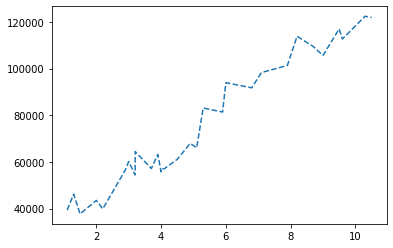

In [48]:
#Plotting the relationship between salary and Experience
y = dataset['Salary']
x = dataset['YearsExperience']
plt.plot(x,y,'--')

#We can see that Salary increases with Years of Experience
#Salary is dependent of Years of experience

In [49]:
#Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 40)

In [56]:
#Printing the training and testing values
print("Training dataset:")
print("\nx_train:\n",x_train)
print("\ny_train:\n",y_train)
print("Testing dataset:")
print("\nx_test:\n",x_test)
print("\ny_test:\n",y_test)

Training dataset:

x_train:
 21     7.1
11     4.0
4      2.2
8      3.2
17     5.3
26     9.5
22     7.9
0      1.1
9      3.7
10     3.9
23     8.2
28    10.3
12     4.0
1      1.3
18     5.9
25     9.0
24     8.7
5      2.9
7      3.2
27     9.6
6      3.0
Name: YearsExperience, dtype: float64

y_train:
 21     98273.0
11     55794.0
4      39891.0
8      64445.0
17     83088.0
26    116969.0
22    101302.0
0      39343.0
9      57189.0
10     63218.0
23    113812.0
28    122391.0
12     56957.0
1      46205.0
18     81363.0
25    105582.0
24    109431.0
5      56642.0
7      54445.0
27    112635.0
6      60150.0
Name: Salary, dtype: float64
Testing dataset:

x_test:
 2      1.5
16     5.1
19     6.0
14     4.5
15     4.9
13     4.1
20     6.8
3      2.0
29    10.5
Name: YearsExperience, dtype: float64

y_test:
 2      37731.0
16     66029.0
19     93940.0
14     61111.0
15     67938.0
13     57081.0
20     91738.0
3      43525.0
29    121872.0
Name: Salary, dtype: float64


In [51]:
from sklearn.linear_model import LinearRegression
#Training the model
reg = LinearRegression().fit(x_train.values.reshape(-1,1),y_train)
#Predict the outcome of test sets
y_predict = reg.predict(x_test.values.reshape(-1,1))
print("Predictions:\n",y_predict)

Predictions:
 [ 41534.28694465  74999.23127173  83365.46735351  69421.74055055
  73140.06769801  65703.4134031   90802.12164841  46182.19587897
 125196.64776236]


In [52]:
#Calculating the accuracy of the model
from sklearn import metrics
print("Prediction Accuracy:",metrics.r2_score(y_test,y_predict))
#r2 score 0-1, finds the correlation of the variables, higher the number, better the prediction

Prediction Accuracy: 0.9308662451595101


In [53]:
#comparing the actual and predicted salaries for the test dataset
error_df = pd.DataFrame({"actual":y_test,
                        "predicted": y_predict,
                        "error": np.abs(y_test-y_predict)})
error_df

,actual,predicted,error
2,37731.0,41534.286945,3803.286945
16,66029.0,74999.231272,8970.231272
19,93940.0,83365.467354,10574.532646
14,61111.0,69421.740551,8310.740551
15,67938.0,73140.067698,5202.067698
13,57081.0,65703.413403,8622.413403
20,91738.0,90802.121648,935.878352
3,43525.0,46182.195879,2657.195879
29,121872.0,125196.647762,3324.647762


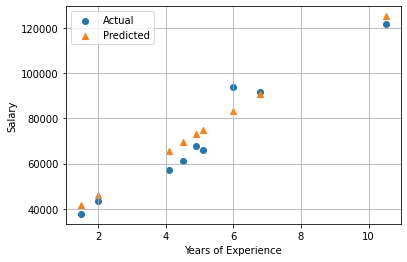

In [54]:
#plotting actual vs predicted salaries
plt.scatter(x_test,y_test,label="Actual")
plt.scatter(x_test,y_predict,marker='^',label="Predicted")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()

In [55]:
#Calculating Mean Squared Error
print(f"Root Mean Squared Error : {mean_squared_error(y_true=y_test, y_pred=y_predict)}")

Root Mean Squared Error : 44024061.33808143
